In [7]:
import os, sys
print(sys.executable) # works this time
print(sys.version)
print(sys.version_info)
import scanpy as sc
from sklearn.cross_decomposition import CCA
from sklearn.manifold import TSNE
from scipy.sparse import csr_matrix
from scipy.sparse import csr_matrix
import numpy as np
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import random
import matplotlib.pyplot as plt

I:\mutiomics\pythonProject\.venv\Scripts\python.exe
3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
sys.version_info(major=3, minor=10, micro=11, releaselevel='final', serial=0)


In [73]:
adata1 = sc.read_h5ad('I:\\mutiomics\\ICC\\KO_merge.h5ad')
adata2 = sc.read_h5ad('I:\\mutiomics\\ICC\\WT_merge.h5ad')

In [42]:
sc.pl.palettes.default_20
example_dict = {i: key for i, key in enumerate(sc.pl.palettes.default_20)}

example_dict

{0: '#1f77b4',
 1: '#ff7f0e',
 2: '#279e68',
 3: '#d62728',
 4: '#aa40fc',
 5: '#8c564b',
 6: '#e377c2',
 7: '#b5bd61',
 8: '#17becf',
 9: '#aec7e8',
 10: '#ffbb78',
 11: '#98df8a',
 12: '#ff9896',
 13: '#c5b0d5',
 14: '#c49c94',
 15: '#f7b6d2',
 16: '#dbdb8d',
 17: '#9edae5',
 18: '#ad494a',
 19: '#8c6d31'}

In [43]:
color_mapping = {i: key for i, key in enumerate(sc.pl.palettes.default_20)}

In [75]:
adata1.obs

,b_prime_label,a_label
0,0,1
1,0,1
2,4,2
3,0,5
4,0,1
...,...,...
16605,2,3
16606,1,3
16607,1,3
16608,3,3


In [44]:
adata1.obs["combine_cluster"].astype(int).unique()

array([0, 5, 6, 4, 2, 3, 1, 7])

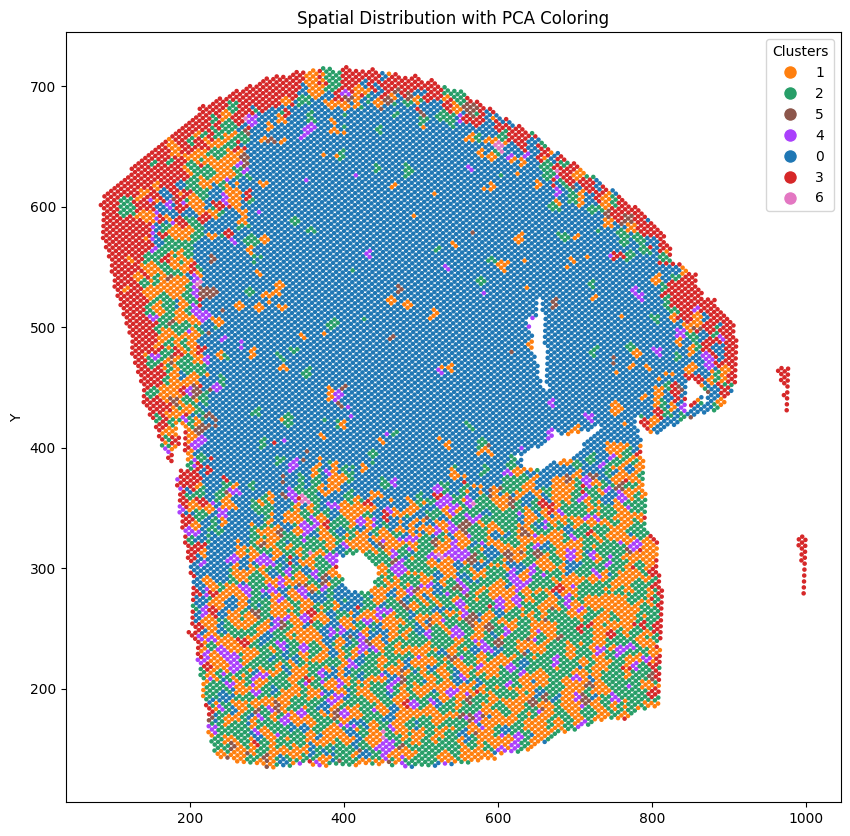

In [77]:
plt.figure(figsize=(10, 10))
plt.scatter(pd.DataFrame(adata1.obsm['spatial']).iloc[:, 0],pd.DataFrame(adata1.obsm['spatial']).iloc[:, 1], 
            c=[color_mapping[category] for category in adata1.obs["a_label"].astype(int).tolist()], s=5, alpha=1)
plt.ylabel('Y')
plt.title('Spatial Distribution with PCA Coloring')
unique_categories = adata1.obs["a_label"].astype(int).unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[cat], markersize=10) for cat in unique_categories]
plt.legend(handles, unique_categories, title="Clusters")
plt.savefig("I:\\mutiomics\\ICC\\combined\\KO_merge.pdf")
plt.show()


In [70]:
adata3 = sc.read_h5ad('I:\\mutiomics\\ICC\\ITO_combine.h5ad')

I:\mutiomics\pythonProject\.venv\lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


<Axes: title={'center': 'clusters'}, xlabel='UMAP1', ylabel='UMAP2'>

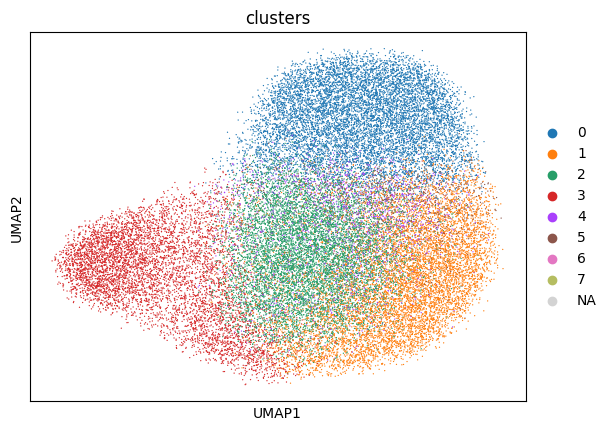

In [71]:
sc.pl.umap(adata3, color='clusters', palette=sc.pl.palettes.default_20,show=False,groups=["0","1","2","3","4","5","6","7"])
#plt.savefig("I:\\mutiomics\\ICC\\combined\\adata2_umap.pdf")

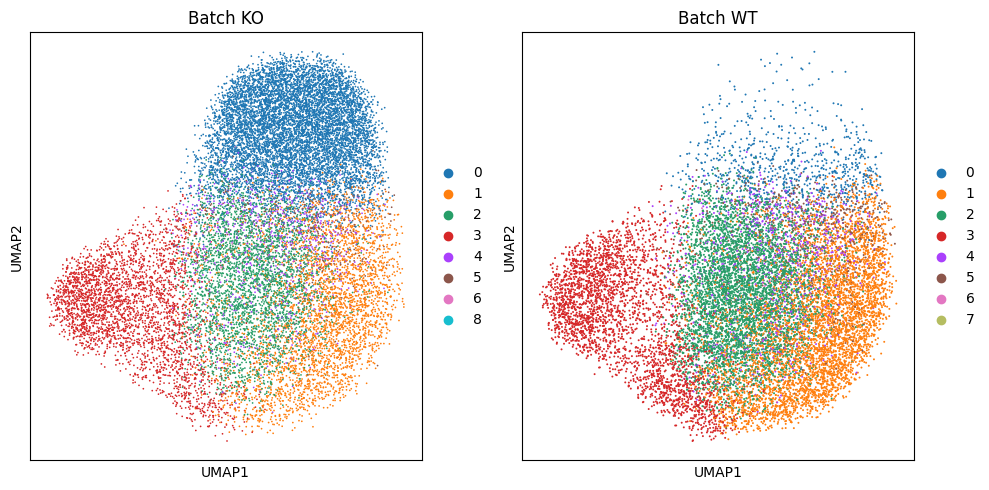

In [72]:
import scanpy as sc
import matplotlib.pyplot as plt

# 获取批次列的唯一值，例如 'batch'
batches = adata3.obs['batch'].unique()

# 创建一个绘图网格，nrows和ncols可以根据你的数据集数量来调整
ncols = len(batches)
fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(5 * ncols, 5))

# 如果只有一个子图，axes将是单一的Axes对象；如果有多个子图，axes是一个数组
if ncols == 1:
    axes = [axes]

# 遍历每个批次并绘制对应的UMAP图
for i, batch in enumerate(batches):
    subset = adata3[adata3.obs['batch'] == batch, :]
    sc.pl.umap(subset, color='clusters', ax=axes[i], show=False, title=f'Batch {batch}')

# 调整图形布局并保存为PDF
plt.tight_layout()
plt.savefig("I:\\mutiomics\\ICC\\combined\\adata2_adata1_umap_ITO.pdf")
plt.show()  # 显示图形

